In [28]:
import pandas as pd

## Carregando o dataset

In [29]:
df = pd.read_csv('tweets_raw_sem_duplicata.csv')
df.head()

,Unnamed: 0,created_at,id,id_str,text,truncated,entities,extended_entities,metadata,source,...,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,lang,trend_t,score,sentiment
0,0,Wed Feb 22 19:05:12 +0000 2023,1628470980925423620,1628470980925423620,Como atuam\n#MoonlightChickenEP5 \n#HEARTLIMING https://t.co/Tbp1Gdy7ll,False,"{'hashtags': [{'text': 'MoonlightChickenEP5', 'indices': [11, 31]}, {'text': 'HEARTLIMING', 'indices': [33, 45]}], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 1628470977553174528, 'id_str': '1628470977553174528', 'indices': [46, 69], 'media_url': 'http://pbs.twimg.com/media/Fpl9ueAXEAAMPCm.jpg', 'media_url_https': 'https://pbs.twimg.com/media/Fpl9ueAXEAAMPCm.jpg', 'url': 'https://t.co/Tbp1Gdy7ll', 'display_url': 'pic.twitter.com/Tbp1Gdy7ll', 'expanded_url': 'https://twitter.com/twayvl/status/1628470980925423620/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 736, 'h': 752, 'resize': 'fit'}, 'large': {'w': 736, 'h': 752, 'resize': 'fit'}, 'small': {'w': 666, 'h': 680, 'resize': 'fit'}}}]}","{'media': [{'id': 1628470977553174528, 'id_str': '1628470977553174528', 'indices': [46, 69], 'media_url': 'http://pbs.twimg.com/media/Fpl9ueAXEAAMPCm.jpg', 'media_url_https': 'https://pbs.twimg.com/media/Fpl9ueAXEAAMPCm.jpg', 'url': 'https://t.co/Tbp1Gdy7ll', 'display_url': 'pic.twitter.com/Tbp1Gdy7ll', 'expanded_url': 'https://twitter.com/twayvl/status/1628470980925423620/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 736, 'h': 752, 'resize': 'fit'}, 'large': {'w': 736, 'h': 752, 'resize': 'fit'}, 'small': {'w': 666, 'h': 680, 'resize': 'fit'}}}]}","{'iso_language_code': 'pt', 'result_type': 'recent'}","<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",...,False,0,0,False,False,False,pt,MoonlightChickenEP5,0.0000,1
1,1,Wed Feb 22 19:03:55 +0000 2023,1628470659444613122,1628470659444613122,"Eles me fazem acreditar que, relacionamento entre amigos, não funciona, mais cedo ou mais tarde, vai desmoronar 😭.… https://t.co/P0Cjt7iTyU",True,"{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/P0Cjt7iTyU', 'expanded_url': 'https://twitter.com/i/web/status/1628470659444613122', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [116, 139]}]}",NaN,"{'iso_language_code': 'pt', 'result_type': 'recent'}","<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",...,False,0,0,False,False,False,pt,MoonlightChickenEP5,0.2263,2
2,2,Wed Feb 22 19:03:34 +0000 2023,1628470570709925890,1628470570709925890,pq eu sinto q isso aqui vai dar muito briga?????? #MoonlightChickenEP5 https://t.co/WHzEhLJK62,False,"{'hashtags': [{'text': 'MoonlightChickenEP5', 'indices': [50, 70]}], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 1628470563600490502, 'id_str': '1628470563600490502', 'indices': [71, 94], 'media_url': 'http://pbs.twimg.com/media/Fpl9WX6WYAYh0xC.jpg', 'media_url_https': 'https://pbs.twimg.com/media/Fpl9WX6WYAYh0xC.jpg', 'url': 'https://t.co/WHzEhLJK62', 'display_url': 'pic.twitter.com/WHzEhLJK62', 'expanded_url': 'https://twitter.com/jmwpallet/status/1628470570709925890/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'large': {'w': 1600, 'h': 720, 'resize': 'fit'}, 'medium': {'w': 1200, 'h': 540, 'resize': 'fit'}, 'small': {'w': 680, 'h': 306, 'resize': 'fit'}}}]}","{'media': [{'id': 1628470563600490502, 'id_str': '1628470563600490502', 'indices': [71, 94], 'media_url': 'http://pbs.twimg.com/media/Fpl9WX6WYAYh0xC.jpg', 'media_url_https': 'https://pbs.twimg.com/media/Fpl9WX6WYAYh0xC.jpg', 'url': 'https://t.co/WHzEhLJK62', 'display_url': 'pic.twitter.com/WHzEhLJK62', 'expanded_url': 'https://twitter.com/jmwpallet/status/1628470570709925890/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize':

In [30]:
# separando apenas as variáveis que quero visualizar
tweet_df = df[['text','sentiment']]
tweet_df.head()

,text,sentiment
0,Como atuam\n#MoonlightChickenEP5 \n#HEARTLIMING https://t.co/Tbp1Gdy7ll,1
1,"Eles me fazem acreditar que, relacionamento entre amigos, não funciona, mais cedo ou mais tarde, vai desmoronar 😭.… https://t.co/P0Cjt7iTyU",2
2,pq eu sinto q isso aqui vai dar muito briga?????? #MoonlightChickenEP5 https://t.co/WHzEhLJK62,1
3,O nome salvo dos dois nos Contatos. Fofos.🤏🏽\n#MoonlightChickenEP5 https://t.co/u85vXyh2nM,1
4,"""Os peixes grandes sempre comem os peixes pequenos""\n""O importante e ele ter dinheiro, pq quem tem dinheiro sempre v… https://t.co/oGCAXGEqJ0",2


In [31]:
tweet_df['sentiment'].value_counts()

1    6435
0    6029
2    4912
Name: sentiment, dtype: int64

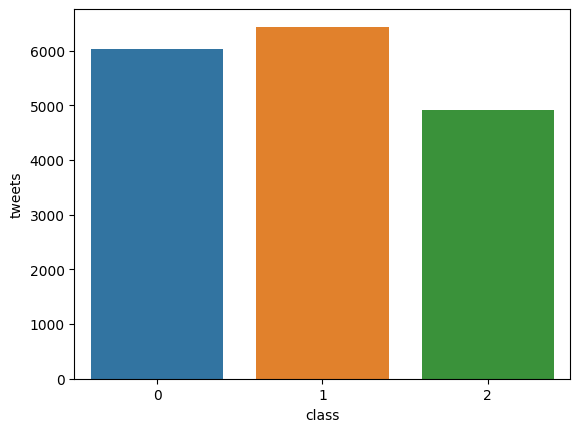

In [32]:
# visualizando os dados em gráfico
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x=tweet_df.sentiment)
plt.xlabel('class')
plt.ylabel('tweets')
plt.show();

## Efentuando a limpeza dos dados

In [33]:
%pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [34]:
# baixando as stopwords
!python -m nltk.downloader stopwords

C:\Users\alsvi\AppData\Local\Programs\Python\Python310\lib\runpy.py:126: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alsvi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [35]:
import nltk
import re

In [36]:
def remove_caracteres(instancia):
    ''' 
    Função de remoção de caracteres:
    'http\S+' - remove url 
    lower() - tranforma o texto em minúsculo
    '[0-9]+' - remove números
    '[^\w\s]' -  remove pontuação
    '[!#$%^&*()]' - remove caractéres espaciais
    '''
    instancia = re.sub(r'http\S+', '', instancia).lower()
    instancia = re.sub(r'[0-9]+', '', instancia)
    instancia = re.sub(r'[^\w\s]', '', instancia)
    instancia = re.sub('[!#$%^&*()]', '', instancia)
    stopwords = set(nltk.corpus.stopwords.words('portuguese'))
    palavras = [i for i in instancia.split() if not i in stopwords]
    return (' '.join(palavras))

In [37]:
def remove_emojis(string):
    '''Função que remove emojis'''
    emoji_pattern = re.compile("["
                                u"\U0001F600-\U0001F64F"  # emoticons
                                u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                                u"\U0001F680-\U0001F6FF"  # transport & map symbols
                                u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                                u"\U00002500-\U00002BEF"  # chinese char
                                u"\U00002702-\U000027B0"
                                u"\U00002702-\U000027B0"
                                u"\U000024C2-\U0001F251"
                                u"\U0001f926-\U0001f937"
                                u"\U00010000-\U0010ffff"
                                u"\u2640-\u2642"
                                u"\u2600-\u2B55"
                                u"\u200d"
                                u"\u23cf"
                                u"\u23e9"
                                u"\u231a"
                                u"\ufe0f"  # dingbats
                                u"\u3030"
                                "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

In [38]:
# aplicando a limpeza dos dados
tweet_df['text_clean'] = tweet_df['text'].apply(remove_caracteres).apply(remove_emojis)

pd.set_option('display.max_colwidth', None)
tweet_df.head()

C:\Users\alsvi\AppData\Local\Temp\ipykernel_19844\1715463276.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_df['text_clean'] = tweet_df['text'].apply(remove_caracteres).apply(remove_emojis)


,text,sentiment,text_clean
0,Como atuam\n#MoonlightChickenEP5 \n#HEARTLIMING https://t.co/Tbp1Gdy7ll,1,atuam moonlightchickenep heartliming
1,"Eles me fazem acreditar que, relacionamento entre amigos, não funciona, mais cedo ou mais tarde, vai desmoronar 😭.… https://t.co/P0Cjt7iTyU",2,fazem acreditar relacionamento amigos funciona cedo tarde vai desmoronar
2,pq eu sinto q isso aqui vai dar muito briga?????? #MoonlightChickenEP5 https://t.co/WHzEhLJK62,1,pq sinto q aqui vai dar briga moonlightchickenep
3,O nome salvo dos dois nos Contatos. Fofos.🤏🏽\n#MoonlightChickenEP5 https://t.co/u85vXyh2nM,1,nome salvo dois contatos fofos moonlightchickenep
4,"""Os peixes grandes sempre comem os peixes pequenos""\n""O importante e ele ter dinheiro, pq quem tem dinheiro sempre v… https://t.co/oGCAXGEqJ0",2,peixes grandes sempre comem peixes pequenos importante ter dinheiro pq dinheiro sempre v


## Lematização com Spacy

In [39]:
%pip install -U pip setuptools wheel
%pip install -U spacy
!python -m spacy download pt_core_news_sm

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
     ---------------------------------------- 0.0/13.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/13.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/13.0 MB ? eta -:--:--
     --------------------------------------- 0.0/13.0 MB 245.8 kB/s eta 0:00:53
     --------------------------------------- 0.0/13.0 MB 245.8 kB/s eta 0:00:53
     --------------------------------------- 0.1/13.0 MB 374.1 kB/s eta 0:00:35
     --------------------------------------- 0.1/13.0 MB 374.1 kB/s eta 0:00:35
     --------------------------------------- 0.1/13.0 MB 374.6 kB/s eta 0:00:35
      -------------------------------------- 0.2/13.0 MB 499.5 kB/s eta 0:00:26
      -------------------------------------- 0.2/13.0 MB 499.5 kB/s eta 0:00:26
      -------------------------------------- 0.3/13.0 MB 610.3 kB/s eta 0:00:21
      ------

In [40]:
import spacy
nlp = spacy.load('pt_core_news_sm')

In [41]:
tweet_df['text_lemma'] = tweet_df['text_clean'].apply(lambda row: " ".join([w.lemma_ for w in nlp(row)]))
tweet_df['text_lemma'] = tweet_df['text_lemma'].apply(remove_caracteres)
tweet_df.head()

C:\Users\alsvi\AppData\Local\Temp\ipykernel_19844\1740279429.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_df['text_lemma'] = tweet_df['text_clean'].apply(lambda row: " ".join([w.lemma_ for w in nlp(row)]))
C:\Users\alsvi\AppData\Local\Temp\ipykernel_19844\1740279429.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_df['text_lemma'] = tweet_df['text_lemma'].apply(remove_caracteres)


,text,sentiment,text_clean,text_lemma
0,Como atuam\n#MoonlightChickenEP5 \n#HEARTLIMING https://t.co/Tbp1Gdy7ll,1,atuam moonlightchickenep heartliming,atuar moonlightchickenep heartliming
1,"Eles me fazem acreditar que, relacionamento entre amigos, não funciona, mais cedo ou mais tarde, vai desmoronar 😭.… https://t.co/P0Cjt7iTyU",2,fazem acreditar relacionamento amigos funciona cedo tarde vai desmoronar,fazer acreditar relacionamento amigo funcionar cedo tarde ir desmoronar
2,pq eu sinto q isso aqui vai dar muito briga?????? #MoonlightChickenEP5 https://t.co/WHzEhLJK62,1,pq sinto q aqui vai dar briga moonlightchickenep,pq sinto q aqui ir dar briga moonlightchickeneurpr
3,O nome salvo dos dois nos Contatos. Fofos.🤏🏽\n#MoonlightChickenEP5 https://t.co/u85vXyh2nM,1,nome salvo dois contatos fofos moonlightchickenep,nome salvo dois contato fofo moonlightchickenep
4,"""Os peixes grandes sempre comem os peixes pequenos""\n""O importante e ele ter dinheiro, pq quem tem dinheiro sempre v… https://t.co/oGCAXGEqJ0",2,peixes grandes sempre comem peixes pequenos importante ter dinheiro pq dinheiro sempre v,peixe grande sempre comer peixe pequeno importante ter dinheiro pq dinheiro sempre v


# Machine Learning - Utils

In [42]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [43]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# Vetorizadores
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Classificadores
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC

# Avaliador
from sklearn.model_selection import cross_val_predict

In [44]:
# Tokenização especial para tweets
from nltk.tokenize import TweetTokenizer

tweet_tokenizer = TweetTokenizer()

In [45]:
def escolher_pipeline(pipe):
    ''' Função para escolher os pipelines dos modelos a serem treinados '''
    
    if(pipe == 1):
        modelo1 = Pipeline([
            ('countVectorizer', CountVectorizer(analyzer='word', tokenizer=tweet_tokenizer.tokenize)),
            ('modelo', LogisticRegression(solver='liblinear'))
        ])
        return modelo1
    
    elif(pipe == 2):
        modelo2 = Pipeline([
            ('tfidfVectorizer', TfidfVectorizer(analyzer='word', tokenizer=tweet_tokenizer.tokenize)),
            ('modelo', LogisticRegression(solver='liblinear'))
        ])
        return modelo2
    
    elif(pipe == 3):
        modelo3 = Pipeline([
            ('countVectorizer', CountVectorizer(analyzer='word', tokenizer=tweet_tokenizer.tokenize)),
            ('modelo', PassiveAggressiveClassifier())
        ])
        return modelo3
    
    elif(pipe == 4):
        modelo4 = Pipeline([
            ('tfidfVectorizer', TfidfVectorizer(analyzer='word', tokenizer=tweet_tokenizer.tokenize)),
            ('modelo', PassiveAggressiveClassifier())
        ])
        return modelo4
    
    elif(pipe == 5):
        modelo5 = Pipeline([
            ('countVectorizer', CountVectorizer(analyzer='word', tokenizer=tweet_tokenizer.tokenize)),
            ('modelo', RandomForestClassifier())
        ])
        return modelo5
    
    elif(pipe == 6):
        modelo6 = Pipeline([
            ('tfidfVectorizer', TfidfVectorizer(analyzer='word', tokenizer=tweet_tokenizer.tokenize)),
            ('modelo', RandomForestClassifier())
        ])
        return modelo6
    
    elif(pipe == 7):
        modelo7 = Pipeline([
            ('countVectorizer', CountVectorizer(analyzer='word', tokenizer=tweet_tokenizer.tokenize)),
            ('modelo', SGDClassifier(max_iter=1000))
        ])
        return modelo7
    
    elif(pipe == 8):
        modelo8 = Pipeline([
            ('tfidfVectorizer', TfidfVectorizer(analyzer='word', tokenizer=tweet_tokenizer.tokenize)),
            ('modelo', SGDClassifier(max_iter=1000))
        ])
        return modelo8
    
    elif(pipe == 9):
        modelo9 = Pipeline([
            ('countVectorizer', CountVectorizer(analyzer='word', tokenizer=tweet_tokenizer.tokenize)),
            ('modelo', SVC())
        ])
        return modelo9
    
    elif(pipe == 10):
        modelo10 = Pipeline([
            ('tfidfVectorizer', TfidfVectorizer(analyzer='word', tokenizer=tweet_tokenizer.tokenize)),
            ('modelo', SVC())
        ])
        return modelo10

In [46]:
%pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [47]:
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

def matriz_confusao(y_test, modelo_predicao):
    ''' Função que exibe a matrix de confusão para avalização do modelo '''
    
    # imprimir relatório de classificação
    print("Relatório de Classificação:\n", 
            metrics.classification_report(y_test, modelo_predicao))
    
    # imprimir a acurácia do modelo
    print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, modelo_predicao)))
    
    # imprimir a matrix de confusão
    print("Matrix de confusão:\n", pd.crosstab(y_test, modelo_predicao, 
                                                rownames=['Real'], 
                                                colnames=['Predito'], 
                                                margins=True),  '')
    
    # plotar a matrix de confusão
    cm = confusion_matrix(y_target = y_test, 
                            y_predicted = modelo_predicao, binary=False)
    fig, ax = plot_confusion_matrix(conf_mat = cm)
    plt.show()
    print('\n')

# Machine Learning - Construindo modelo

In [48]:
X = tweet_df['text_lemma']
y = tweet_df['sentiment']

X.shape, y.shape

((17376,), (17376,))

In [49]:
#separando os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((13032,), (13032,), (4344,), (4344,))

## Modelos

c:\Users\alsvi\notebooks\analise_sentimet_twitter_2023\venv\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


************************************************************************************************************************************
Modelo: Pipeline(steps=[('countVectorizer',
                 CountVectorizer(tokenizer=<bound method TweetTokenizer.tokenize of <nltk.tokenize.casual.TweetTokenizer object at 0x0000026AC7C1B640>>)),
                ('modelo', LogisticRegression(solver='liblinear'))])

AVALIANDO O MODELO

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.78      0.71      0.75      1475
           1       0.72      0.85      0.78      1632
           2       0.85      0.75      0.80      1237

    accuracy                           0.78      4344
   macro avg       0.79      0.77      0.78      4344
weighted avg       0.78      0.78      0.77      4344

Acurácia: 0.7753

Matrix de confusão:
 Predito     0     1     2   All
Real                           
0        1047   331    97  1475
1         178  1390    64  1632
2

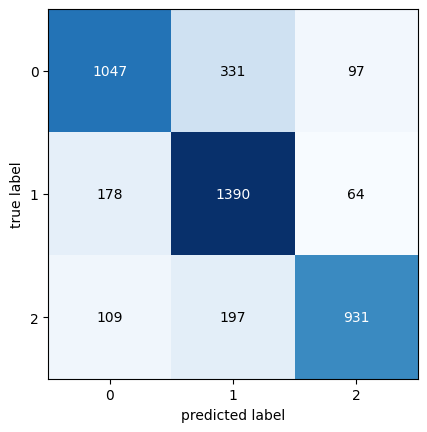




VALIDAÇÃO CRUZADA



c:\Users\alsvi\notebooks\analise_sentimet_twitter_2023\venv\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\alsvi\notebooks\analise_sentimet_twitter_2023\venv\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\alsvi\notebooks\analise_sentimet_twitter_2023\venv\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\alsvi\notebooks\analise_sentimet_twitter_2023\venv\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\alsvi\notebooks\analise_sentimet_twitter_2023\venv\lib\site-packages\sklearn\feature_ex

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.77      0.68      0.72      6029
           1       0.70      0.84      0.76      6435
           2       0.81      0.72      0.76      4912

    accuracy                           0.75     17376
   macro avg       0.76      0.75      0.75     17376
weighted avg       0.76      0.75      0.75     17376

Acurácia: 0.7492

Matrix de confusão:
 Predito     0     1     2    All
Real                            
0        4075  1457   497   6029
1         720  5399   316   6435
2         499   869  3544   4912
All      5294  7725  4357  17376 


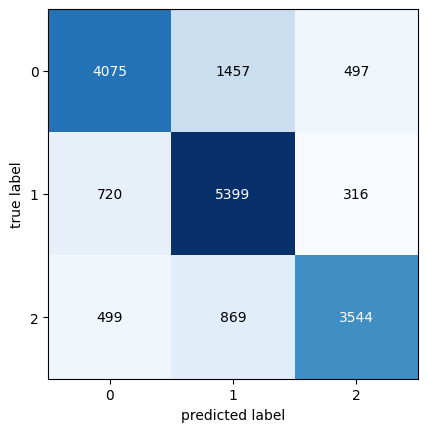

c:\Users\alsvi\notebooks\analise_sentimet_twitter_2023\venv\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


************************************************************************************************************************************
Modelo: Pipeline(steps=[('tfidfVectorizer',
                 TfidfVectorizer(tokenizer=<bound method TweetTokenizer.tokenize of <nltk.tokenize.casual.TweetTokenizer object at 0x0000026AC7C1B640>>)),
                ('modelo', LogisticRegression(solver='liblinear'))])

AVALIANDO O MODELO

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.72      0.72      0.72      1475
           1       0.70      0.82      0.76      1632
           2       0.85      0.68      0.76      1237

    accuracy                           0.74      4344
   macro avg       0.76      0.74      0.74      4344
weighted avg       0.75      0.74      0.74      4344

Acurácia: 0.7440

Matrix de confusão:
 Predito     0     1    2   All
Real                          
0        1057   324   94  1475
1         244  1333   55  1632
2    

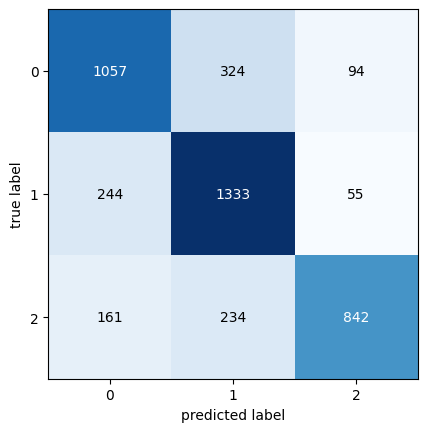




VALIDAÇÃO CRUZADA



c:\Users\alsvi\notebooks\analise_sentimet_twitter_2023\venv\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\alsvi\notebooks\analise_sentimet_twitter_2023\venv\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\alsvi\notebooks\analise_sentimet_twitter_2023\venv\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\alsvi\notebooks\analise_sentimet_twitter_2023\venv\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\alsvi\notebooks\analise_sentimet_twitter_2023\venv\lib\site-packages\sklearn\feature_ex

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.71      0.68      0.70      6029
           1       0.67      0.79      0.72      6435
           2       0.80      0.66      0.72      4912

    accuracy                           0.71     17376
   macro avg       0.73      0.71      0.71     17376
weighted avg       0.72      0.71      0.71     17376

Acurácia: 0.7132

Matrix de confusão:
 Predito     0     1     2    All
Real                            
0        4113  1458   458   6029
1        1048  5059   328   6435
2         636  1056  3220   4912
All      5797  7573  4006  17376 


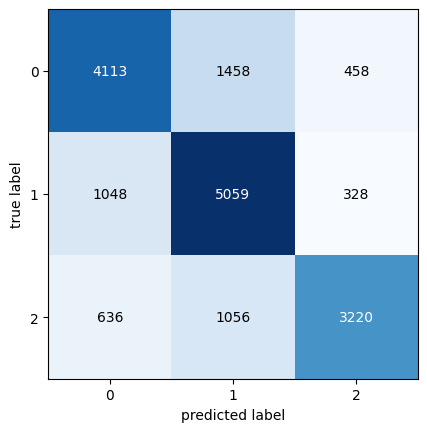

c:\Users\alsvi\notebooks\analise_sentimet_twitter_2023\venv\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


************************************************************************************************************************************
Modelo: Pipeline(steps=[('countVectorizer',
                 CountVectorizer(tokenizer=<bound method TweetTokenizer.tokenize of <nltk.tokenize.casual.TweetTokenizer object at 0x0000026AC7C1B640>>)),
                ('modelo', PassiveAggressiveClassifier())])

AVALIANDO O MODELO

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.74      0.71      0.73      1475
           1       0.74      0.78      0.76      1632
           2       0.79      0.77      0.78      1237

    accuracy                           0.75      4344
   macro avg       0.76      0.75      0.75      4344
weighted avg       0.75      0.75      0.75      4344

Acurácia: 0.7523

Matrix de confusão:
 Predito     0     1     2   All
Real                           
0        1054   287   134  1475
1         245  1265   122  1632
2         

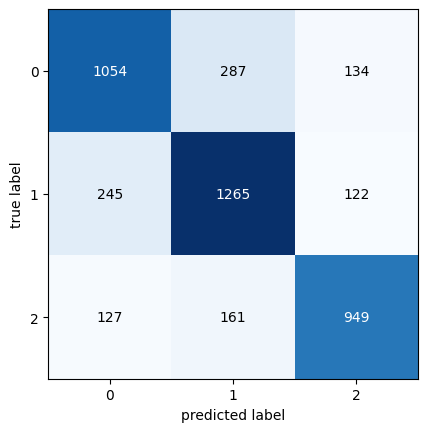




VALIDAÇÃO CRUZADA



c:\Users\alsvi\notebooks\analise_sentimet_twitter_2023\venv\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\alsvi\notebooks\analise_sentimet_twitter_2023\venv\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\alsvi\notebooks\analise_sentimet_twitter_2023\venv\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\alsvi\notebooks\analise_sentimet_twitter_2023\venv\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\alsvi\notebooks\analise_sentimet_twitter_2023\venv\lib\site-packages\sklearn\feature_ex

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.72      0.68      0.70      6029
           1       0.71      0.77      0.74      6435
           2       0.76      0.73      0.74      4912

    accuracy                           0.73     17376
   macro avg       0.73      0.73      0.73     17376
weighted avg       0.73      0.73      0.73     17376

Acurácia: 0.7266

Matrix de confusão:
 Predito     0     1     2    All
Real                            
0        4100  1314   615   6029
1         983  4946   506   6435
2         592   741  3579   4912
All      5675  7001  4700  17376 


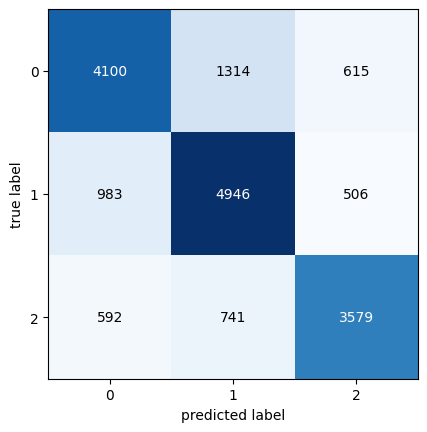

c:\Users\alsvi\notebooks\analise_sentimet_twitter_2023\venv\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


************************************************************************************************************************************
Modelo: Pipeline(steps=[('tfidfVectorizer',
                 TfidfVectorizer(tokenizer=<bound method TweetTokenizer.tokenize of <nltk.tokenize.casual.TweetTokenizer object at 0x0000026AC7C1B640>>)),
                ('modelo', PassiveAggressiveClassifier())])

AVALIANDO O MODELO

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.72      0.71      0.72      1475
           1       0.72      0.75      0.74      1632
           2       0.77      0.75      0.76      1237

    accuracy                           0.74      4344
   macro avg       0.74      0.74      0.74      4344
weighted avg       0.74      0.74      0.74      4344

Acurácia: 0.7380

Matrix de confusão:
 Predito     0     1     2   All
Real                           
0        1052   287   136  1475
1         267  1231   134  1632
2         

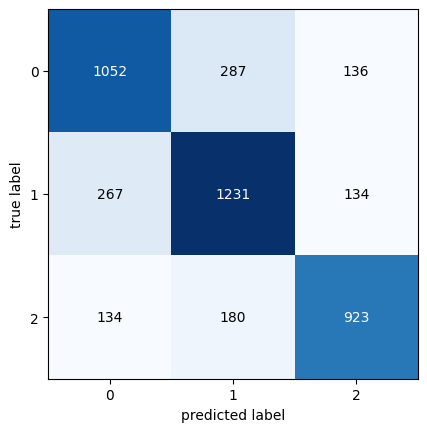




VALIDAÇÃO CRUZADA



c:\Users\alsvi\notebooks\analise_sentimet_twitter_2023\venv\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\alsvi\notebooks\analise_sentimet_twitter_2023\venv\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\alsvi\notebooks\analise_sentimet_twitter_2023\venv\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\alsvi\notebooks\analise_sentimet_twitter_2023\venv\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\alsvi\notebooks\analise_sentimet_twitter_2023\venv\lib\site-packages\sklearn\feature_ex

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.70      0.69      0.69      6029
           1       0.70      0.73      0.71      6435
           2       0.74      0.72      0.73      4912

    accuracy                           0.71     17376
   macro avg       0.71      0.71      0.71     17376
weighted avg       0.71      0.71      0.71     17376

Acurácia: 0.7116

Matrix de confusão:
 Predito     0     1     2    All
Real                            
0        4132  1257   640   6029
1        1142  4684   609   6435
2         630   733  3549   4912
All      5904  6674  4798  17376 


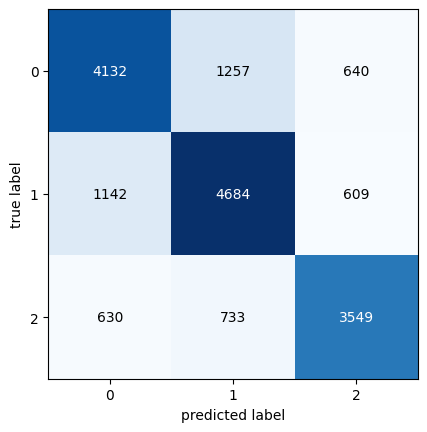

c:\Users\alsvi\notebooks\analise_sentimet_twitter_2023\venv\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


************************************************************************************************************************************
Modelo: Pipeline(steps=[('countVectorizer',
                 CountVectorizer(tokenizer=<bound method TweetTokenizer.tokenize of <nltk.tokenize.casual.TweetTokenizer object at 0x0000026AC7C1B640>>)),
                ('modelo', RandomForestClassifier())])

AVALIANDO O MODELO

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.77      0.65      0.71      1475
           1       0.67      0.87      0.76      1632
           2       0.86      0.69      0.77      1237

    accuracy                           0.74      4344
   macro avg       0.77      0.74      0.74      4344
weighted avg       0.76      0.74      0.74      4344

Acurácia: 0.7426

Matrix de confusão:
 Predito     0     1     2   All
Real                           
0         956   421    98  1475
1         173  1412    47  1632
2         105  

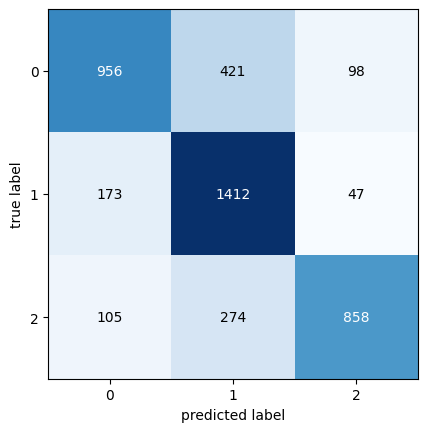




VALIDAÇÃO CRUZADA



c:\Users\alsvi\notebooks\analise_sentimet_twitter_2023\venv\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\alsvi\notebooks\analise_sentimet_twitter_2023\venv\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\alsvi\notebooks\analise_sentimet_twitter_2023\venv\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\alsvi\notebooks\analise_sentimet_twitter_2023\venv\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\alsvi\notebooks\analise_sentimet_twitter_2023\venv\lib\site-packages\sklearn\feature_ex

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.77      0.62      0.69      6029
           1       0.64      0.86      0.73      6435
           2       0.82      0.66      0.73      4912

    accuracy                           0.72     17376
   macro avg       0.74      0.71      0.72     17376
weighted avg       0.74      0.72      0.72     17376

Acurácia: 0.7186

Matrix de confusão:
 Predito     0     1     2    All
Real                            
0        3737  1847   445   6029
1         666  5523   246   6435
2         457  1228  3227   4912
All      4860  8598  3918  17376 


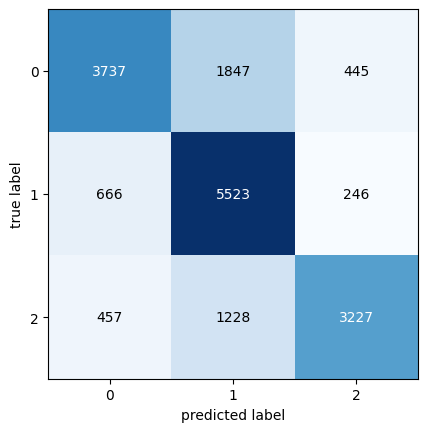

c:\Users\alsvi\notebooks\analise_sentimet_twitter_2023\venv\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


************************************************************************************************************************************
Modelo: Pipeline(steps=[('tfidfVectorizer',
                 TfidfVectorizer(tokenizer=<bound method TweetTokenizer.tokenize of <nltk.tokenize.casual.TweetTokenizer object at 0x0000026AC7C1B640>>)),
                ('modelo', RandomForestClassifier())])

AVALIANDO O MODELO

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.73      0.68      0.71      1475
           1       0.69      0.83      0.75      1632
           2       0.84      0.69      0.76      1237

    accuracy                           0.74      4344
   macro avg       0.75      0.73      0.74      4344
weighted avg       0.75      0.74      0.74      4344

Acurácia: 0.7371

Matrix de confusão:
 Predito     0     1     2   All
Real                           
0        1003   373    99  1475
1         225  1349    58  1632
2         140  

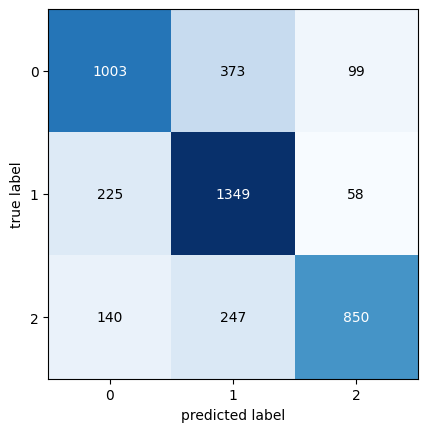




VALIDAÇÃO CRUZADA



c:\Users\alsvi\notebooks\analise_sentimet_twitter_2023\venv\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\alsvi\notebooks\analise_sentimet_twitter_2023\venv\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\alsvi\notebooks\analise_sentimet_twitter_2023\venv\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\alsvi\notebooks\analise_sentimet_twitter_2023\venv\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\alsvi\notebooks\analise_sentimet_twitter_2023\venv\lib\site-packages\sklearn\feature_ex

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.73      0.65      0.69      6029
           1       0.66      0.82      0.73      6435
           2       0.81      0.65      0.72      4912

    accuracy                           0.71     17376
   macro avg       0.73      0.71      0.71     17376
weighted avg       0.72      0.71      0.71     17376

Acurácia: 0.7137

Matrix de confusão:
 Predito     0     1     2    All
Real                            
0        3937  1633   459   6029
1         853  5267   315   6435
2         583  1132  3197   4912
All      5373  8032  3971  17376 


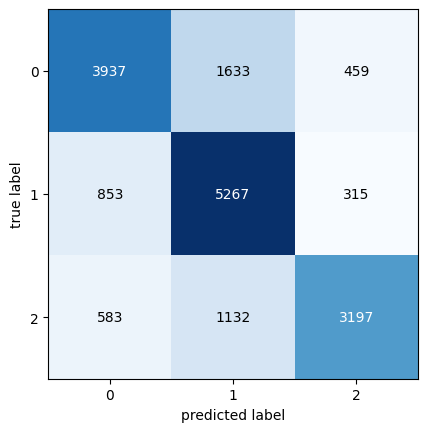

c:\Users\alsvi\notebooks\analise_sentimet_twitter_2023\venv\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


************************************************************************************************************************************
Modelo: Pipeline(steps=[('countVectorizer',
                 CountVectorizer(tokenizer=<bound method TweetTokenizer.tokenize of <nltk.tokenize.casual.TweetTokenizer object at 0x0000026AC7C1B640>>)),
                ('modelo', SGDClassifier())])

AVALIANDO O MODELO

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.80      0.72      0.75      1475
           1       0.74      0.84      0.79      1632
           2       0.84      0.78      0.81      1237

    accuracy                           0.78      4344
   macro avg       0.79      0.78      0.78      4344
weighted avg       0.79      0.78      0.78      4344

Acurácia: 0.7815

Matrix de confusão:
 Predito     0     1     2   All
Real                           
0        1055   316   104  1475
1         170  1379    83  1632
2         100   176   96

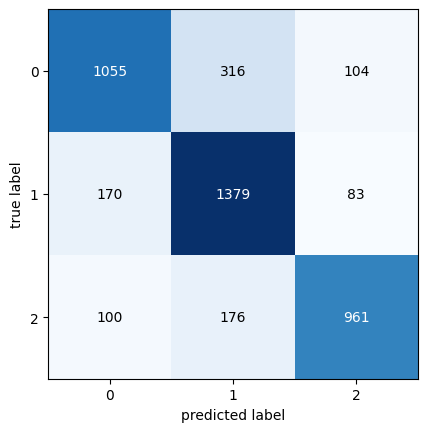




VALIDAÇÃO CRUZADA



c:\Users\alsvi\notebooks\analise_sentimet_twitter_2023\venv\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\alsvi\notebooks\analise_sentimet_twitter_2023\venv\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\alsvi\notebooks\analise_sentimet_twitter_2023\venv\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\alsvi\notebooks\analise_sentimet_twitter_2023\venv\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\alsvi\notebooks\analise_sentimet_twitter_2023\venv\lib\site-packages\sklearn\feature_ex

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.78      0.69      0.73      6029
           1       0.72      0.84      0.78      6435
           2       0.81      0.77      0.79      4912

    accuracy                           0.76     17376
   macro avg       0.77      0.76      0.76     17376
weighted avg       0.77      0.76      0.76     17376

Acurácia: 0.7642

Matrix de confusão:
 Predito     0     1     2    All
Real                            
0        4137  1366   526   6029
1         702  5378   355   6435
2         456   693  3763   4912
All      5295  7437  4644  17376 


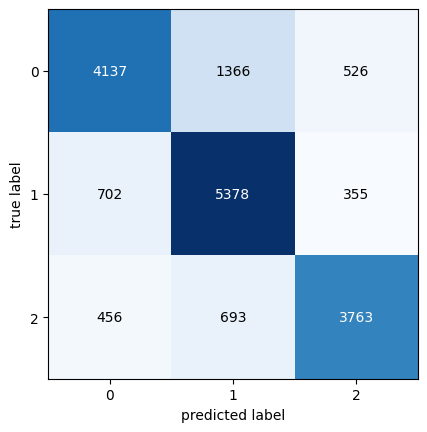

c:\Users\alsvi\notebooks\analise_sentimet_twitter_2023\venv\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


************************************************************************************************************************************
Modelo: Pipeline(steps=[('tfidfVectorizer',
                 TfidfVectorizer(tokenizer=<bound method TweetTokenizer.tokenize of <nltk.tokenize.casual.TweetTokenizer object at 0x0000026AC7C1B640>>)),
                ('modelo', SGDClassifier())])

AVALIANDO O MODELO

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.76      0.71      0.74      1475
           1       0.72      0.84      0.77      1632
           2       0.86      0.75      0.80      1237

    accuracy                           0.77      4344
   macro avg       0.78      0.76      0.77      4344
weighted avg       0.77      0.77      0.77      4344

Acurácia: 0.7682

Matrix de confusão:
 Predito     0     1     2   All
Real                           
0        1050   329    96  1475
1         209  1363    60  1632
2         117   196   92

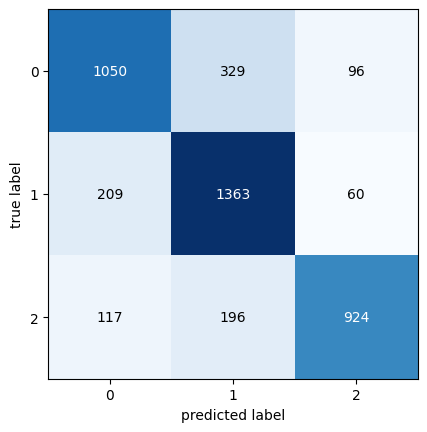




VALIDAÇÃO CRUZADA



c:\Users\alsvi\notebooks\analise_sentimet_twitter_2023\venv\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\alsvi\notebooks\analise_sentimet_twitter_2023\venv\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\alsvi\notebooks\analise_sentimet_twitter_2023\venv\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\alsvi\notebooks\analise_sentimet_twitter_2023\venv\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\alsvi\notebooks\analise_sentimet_twitter_2023\venv\lib\site-packages\sklearn\feature_ex

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.76      0.67      0.71      6029
           1       0.69      0.82      0.75      6435
           2       0.82      0.72      0.77      4912

    accuracy                           0.74     17376
   macro avg       0.75      0.74      0.74     17376
weighted avg       0.75      0.74      0.74     17376

Acurácia: 0.7401

Matrix de confusão:
 Predito     0     1     2    All
Real                            
0        4031  1500   498   6029
1         843  5288   304   6435
2         460   911  3541   4912
All      5334  7699  4343  17376 


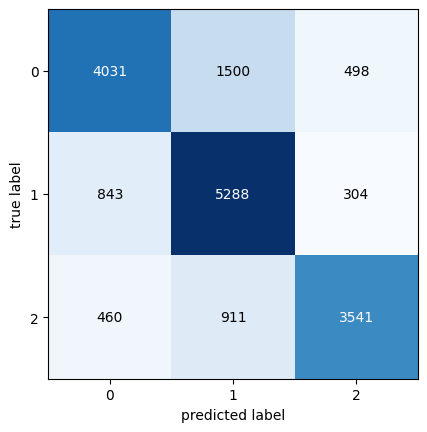

c:\Users\alsvi\notebooks\analise_sentimet_twitter_2023\venv\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


************************************************************************************************************************************
Modelo: Pipeline(steps=[('countVectorizer',
                 CountVectorizer(tokenizer=<bound method TweetTokenizer.tokenize of <nltk.tokenize.casual.TweetTokenizer object at 0x0000026AC7C1B640>>)),
                ('modelo', SVC())])

AVALIANDO O MODELO

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.73      0.68      0.70      1475
           1       0.67      0.85      0.75      1632
           2       0.87      0.64      0.73      1237

    accuracy                           0.73      4344
   macro avg       0.76      0.72      0.73      4344
weighted avg       0.75      0.73      0.73      4344

Acurácia: 0.7318

Matrix de confusão:
 Predito     0     1    2   All
Real                          
0        1001   389   85  1475
1         205  1389   38  1632
2         161   287  789  1237
All    

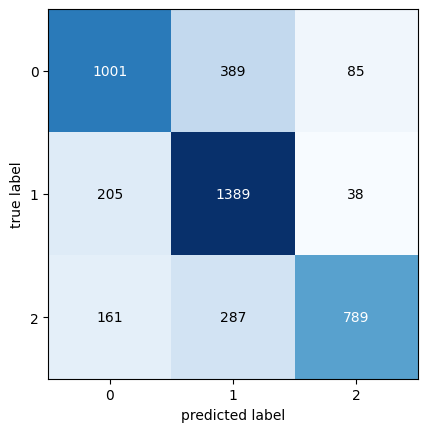




VALIDAÇÃO CRUZADA



c:\Users\alsvi\notebooks\analise_sentimet_twitter_2023\venv\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\alsvi\notebooks\analise_sentimet_twitter_2023\venv\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\alsvi\notebooks\analise_sentimet_twitter_2023\venv\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\alsvi\notebooks\analise_sentimet_twitter_2023\venv\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\alsvi\notebooks\analise_sentimet_twitter_2023\venv\lib\site-packages\sklearn\feature_ex

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.72      0.66      0.69      6029
           1       0.65      0.83      0.73      6435
           2       0.83      0.62      0.71      4912

    accuracy                           0.71     17376
   macro avg       0.73      0.70      0.71     17376
weighted avg       0.73      0.71      0.71     17376

Acurácia: 0.7113

Matrix de confusão:
 Predito     0     1     2    All
Real                            
0        3960  1666   403   6029
1         846  5356   233   6435
2         684  1185  3043   4912
All      5490  8207  3679  17376 


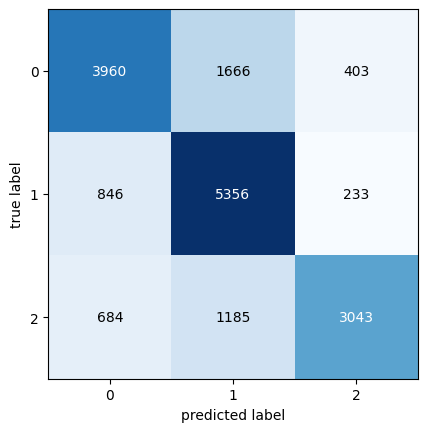

c:\Users\alsvi\notebooks\analise_sentimet_twitter_2023\venv\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


************************************************************************************************************************************
Modelo: Pipeline(steps=[('tfidfVectorizer',
                 TfidfVectorizer(tokenizer=<bound method TweetTokenizer.tokenize of <nltk.tokenize.casual.TweetTokenizer object at 0x0000026AC7C1B640>>)),
                ('modelo', SVC())])

AVALIANDO O MODELO

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.73      0.71      0.72      1475
           1       0.70      0.84      0.76      1632
           2       0.86      0.68      0.76      1237

    accuracy                           0.75      4344
   macro avg       0.76      0.74      0.75      4344
weighted avg       0.76      0.75      0.75      4344

Acurácia: 0.7465

Matrix de confusão:
 Predito     0     1    2   All
Real                          
0        1045   343   87  1475
1         223  1363   46  1632
2         160   242  835  1237
All    

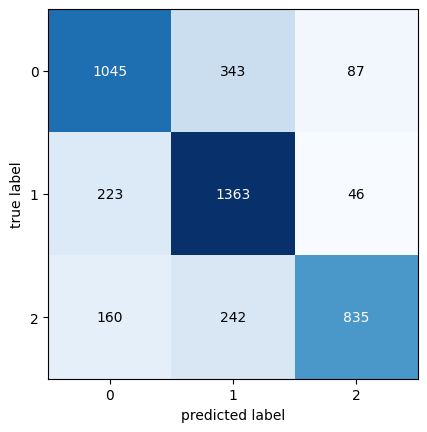




VALIDAÇÃO CRUZADA



c:\Users\alsvi\notebooks\analise_sentimet_twitter_2023\venv\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\alsvi\notebooks\analise_sentimet_twitter_2023\venv\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\alsvi\notebooks\analise_sentimet_twitter_2023\venv\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\alsvi\notebooks\analise_sentimet_twitter_2023\venv\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\alsvi\notebooks\analise_sentimet_twitter_2023\venv\lib\site-packages\sklearn\feature_ex

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.72      0.68      0.70      6029
           1       0.67      0.81      0.73      6435
           2       0.82      0.65      0.73      4912

    accuracy                           0.72     17376
   macro avg       0.74      0.71      0.72     17376
weighted avg       0.73      0.72      0.72     17376

Acurácia: 0.7185

Matrix de confusão:
 Predito     0     1     2    All
Real                            
0        4074  1535   420   6029
1         947  5228   260   6435
2         648  1081  3183   4912
All      5669  7844  3863  17376 


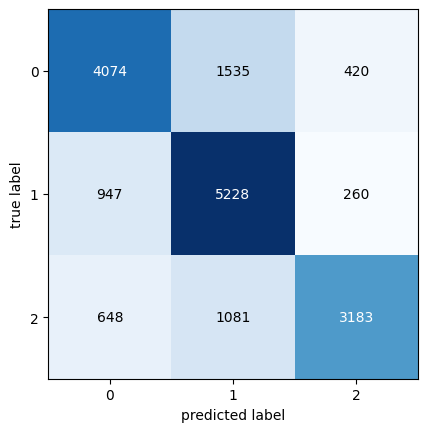

In [50]:
reports=[]
modelos=[]

for i in range(1,11):
    modelo = escolher_pipeline(i)
    nome = (str(modelo))# nome do modelo
    modelo = modelo.fit(X_train, y_train)
    modelo_pred = modelo.predict(X_test)
    
    #relatório
    reports.append(metrics.classification_report(y_test, modelo_pred, output_dict=True))
    modelos.append(nome)
    
    print("*"*132)
    print(f"Modelo: {nome}\n")
    print("AVALIANDO O MODELO\n")
    matriz_confusao(y_test, modelo_pred)
    
    print('\nVALIDAÇÃO CRUZADA\n')
    validacao_cruzada = cross_val_predict(modelo, X, y, cv=10)
    matriz_confusao(y, validacao_cruzada)

## Geração do relatório para análise do melhor modelo

In [51]:
# criando o dataframe para o relatório consolidado
columns = ['modelo', 'f1_score', 'accuracy']
report_df = pd.DataFrame(columns=columns)

In [52]:
# loop para criação do relátorio consolidado
for i in range(len(reports)):
    report_df.loc[i] = [modelos[i],
                    round(reports[i]['weighted avg']['f1-score'], 2), 
                    round(reports[i]['accuracy'], 2)]

In [53]:
def formatar_nome_modelo(modelo):
    ''' Função que formata o nome do modelo junto com o vetorizador '''
    vec = modelo[18:33] #nome do vetorizador
    
    start_name = (modelo.rfind("modelo")+9) #início do nome do classificador
    end_name = (modelo.rfind('(')) #fim do nome do classificador
    
    classif = modelo[start_name: end_name] #nome completo do classificador
    return(f'{classif} - {vec}')

In [54]:
report_df['modelo'] = report_df['modelo'].apply(formatar_nome_modelo)
report_df.sort_values(by='f1_score', ascending=False)

,modelo,f1_score,accuracy
6,SGDClassifier - countVectorizer,0.78,0.78
0,LogisticRegression - countVectorizer,0.77,0.78
7,SGDClassifier - tfidfVectorizer,0.77,0.77
2,PassiveAggressiveClassifier - countVectorizer,0.75,0.75
9,SVC - tfidfVectorizer,0.75,0.75
1,LogisticRegression - tfidfVectorizer,0.74,0.74
3,PassiveAggressiveClassifier - tfidfVectorizer,0.74,0.74
4,RandomForestClassifier - countVectorizer,0.74,0.74
5,RandomForestClassifier - tfidfVectorizer,0.74,0.74
8,SVC - countVectorizer,0.73,0.73
